In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from msslib.utils import *
from msslib.visualise import label_colour_image

import random

from pystruct.models import GridCRF
import pystruct.learners as ssvm


crf = GridCRF(neighborhood=4)
clf = ssvm.OneSlackSSVM(model=crf, inference_cache=100, tol=.1,)


In [3]:
data_dir = "/home/finlay/HMT/data/VenetusA/block_samples/"
all_file_paths = listpaths(data_dir)
data_paths = sorted(list(filter(lambda x: '_data.npy' in x, all_file_paths)))
label_paths = sorted(list(filter(lambda x: '_label.npy' in x, all_file_paths)))

train_X = np.asarray([np.load(p) for p in data_paths[:2]])
train_Y = np.asarray([np.load(p) for p in label_paths[:2]]) / 10
train_Y = train_Y.astype('int')

In [ ]:
clf.fit(train_X, train_Y)

In [ ]:
test_X = np.asarray([np.load(p) for p in data_paths[2:30]])
ground_Y = np.asarray([np.load(p) for p in label_paths[2:30]])

Y_pred = np.array(clf.predict(test_X))
print("overall accuracy (training set): %f" % clf.score(X, Y))

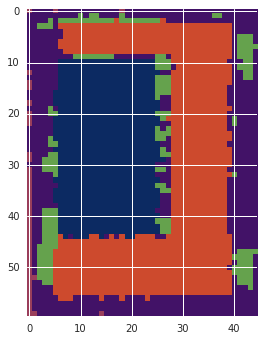

In [16]:
plt.imshow(label_colour_image(train_Y[0].reshape(60,45)+4)*255, interpolation='nearest')

In [17]:
import datetime
print(datetime.datetime.now())

2016-05-23 22:19:46.292260
